In [5]:
import numpy as np 
import matplotlib.pyplot as plt

## Simpson's method of approximating integral

In [6]:
def func(x):
    return (np.e**(x**2))/x

a = 1.
b = 2.
n = 5
s1 = 0
s2 = 1
eps = np.e**-10
while abs(s2-s1) >= eps:
    s1 = s2
    n *= 2
    h = (b-a)/n
    arr = np.array([func(a+i*h/2) for i in range(2*n+1)])
    s2 = (h/6)*(arr[0] + arr[-1] + 2*sum(arr[1: -1]) + 2 * sum(arr[range(1, 2*n, 2)]))
    print(s2)
n

8.867939889103578
8.867882196943931
8.867878569084638


40

## SPLINES

In [7]:
def f(x):
    return np.sin(x)
#                                            QUADSPLINE
def quadspline_equalsteps(d_0):
    a = [0] * n          # ax^2 + bx + c
    b = [0] * n
    c = [0] * n
    d = [0] * n
    d[0] = d_0
    polynomials = []*n
    for i in range(n):
        if i == n-1:
            a[i] = (y[i+1]-y[i])/(h[0]**2)-d[i]/h[0]
            b[i] = -2*x[i]*a[i] + d[i]
            c[i] = -x[i]*(x[i]*a[i] + b[i]) + y[i]
        else:
            a[i] = (y[i + 1] - y[i]) / (h[0] ** 2) - d[i] / h[0]
            b[i] = -2 * x[i] * a[i] + d[i]
            c[i] = -x[i] * (x[i] * a[i] + b[i]) + y[i]
            d[i + 1] = 2 * a[i] * x[i + 1] + b[i]
        polynomials.append(np.array([a[i], b[i], c[i]]))
    return polynomials
def func_quad(arr, arg):
    return arr[0]*(arg**2) + arr[1]*arg + arr[2]

In [8]:
#                                            CUBICSPLINE
def cubicspline():
    m = [0]*n
    M = [0]*(n+1)
    r = [0]*n
    for i in range(1, n):
        r[i] = 6*((y[i+1]-y[i])/h[i] - (y[i] - y[i-1])/h[i-1])
    #   solving 3-diagonal system
    a = [0]*2 + [h[i] for i in range(1, n-1)]
    d = [0] + [2*(h[i-1]+h[i]) for i in range(1, n)]
    b = [0] + [h[i] for i in range(1, n-1)] + [0]
    v = [0]*n
    p = [0]*n
    v[1] = b[1]/d[1]
    p[1] = r[1]/d[1]
    for i in range(2, n):
        u = d[i] - v[i-1] * a[i]
        v[i] = b[i]/u
        p[i] = (r[i]-p[i-1]*a[i])/u
    M[n-1] = p[n-1]
    for i in range(n-2, 0, -1):
        M[i] = p[i] - v[i] * M[i+1]
    #    end of 3 diagonal algorithm
    for i in range(n):
        m[i] = (y[i+1]-y[i])/h[i] - h[i]*(2*M[i]+M[i+1])/6
    return m, M
def func_cubic(i, arg):
    return y[i] + m[i]*(arg-x[i]) + M[i]*((arg-x[i])**2)/2 + (M[i+1]-M[i])*((arg-x[i])**3)/(6*h[i])


## Examples

[[ -3.28577086   3.           0.        ]
 [  2.71707028  -4.54339264   2.36982669]
 [ -3.63724714  11.4267489   -7.66450918]
 [  2.71707028 -12.52846341  14.91274653]
 [ -3.28577086  17.64510716 -23.00448054]
 [  3.28577086 -23.64510716  41.85403646]
 [ -2.71707028  21.6152487  -43.45972443]
 [  3.63724714 -34.28024669  79.46088996]
 [ -2.71707028  29.60031947 -81.08848394]
 [  3.28577086 -38.29021432 110.86747806]]
[0.9990925142090151, 0.8082828229478868, 0.3087365658433794, -0.30873656584337916, -0.8082828229478869, -0.9990925142090151, -0.8082828229478869, -0.3087365658433794, 0.308736565843379, 0.8082828229478868]
[0, -0.60736611108094, -0.9827390113438038, -0.9827390113438055, -0.6073661110809395, -2.7755575615628914e-17, 0.6073661110809396, 0.9827390113438044, 0.9827390113438046, 0.6073661110809404, 0]


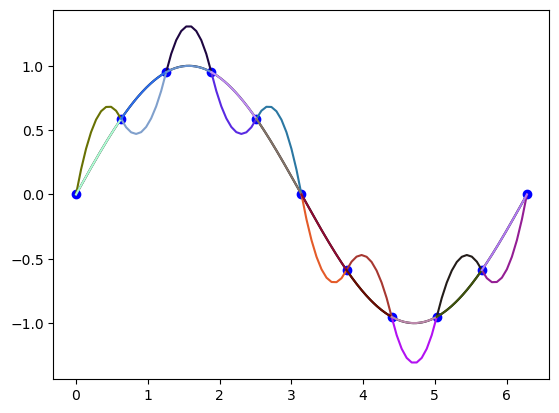

In [9]:
a = 0
b = 2*np.pi
n = 10
step = (b-a)/n
x = np.arange(a, b + step, step)
# x = np.linspace(a, b, n)
h = [0] * n
for i in range(n):
    h[i] = x[i + 1] - x[i]
y = f(x)
X = np.linspace(a, b, 3000)
plt.plot(X, f(X), 'black')
plt.plot(x, y, 'bo')
#            QUAD
p_noms = np.array(quadspline_equalsteps(3))
print(p_noms)
for i in range(n):
    w = np.linspace(x[i], x[i+1], 10)
    plt.plot(w, func_quad(p_noms[i], w), color=(np.random.random(3)))
#            CUBIC
m, M = cubicspline()
print(m)
print(M)
for i in range(n):
    w = np.linspace(x[i], x[i+1], 10)
    plt.plot(w, func_cubic(i, w), color=(np.random.random(3)))
plt.show()

##                                          INTERPOLATION

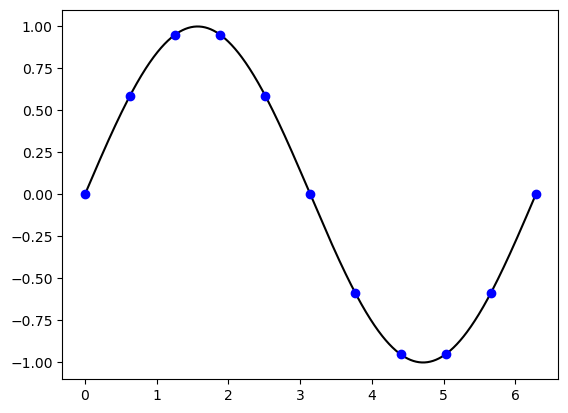

In [10]:
def f(x):
    return np.sin(x)
def lagranje(x):
    r = 0
    for i in range(n):
        nom = 1
        denom = 1
        for j in range(n):
            if j != i:
                nom *= (x-x[j])
                denom *= (x[i]-x[j])
        r += y[i]*(nom/denom)
    return r


a = 0
b = 2*np.pi
n = 10
h = (b-a)/n
x = np.arange(a, b + h, h)
# x = np.linspace(a, b, n)
y = f(x)
X = np.linspace(a, b, 800)
plt.plot(X, f(X), 'black')
plt.plot(x, y, 'bo')